In [1]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from orix import plot, sampling
from orix.crystal_map import Phase  
from orix.quaternion import Orientation, symmetry
from orix.vector import Vector3d

In [11]:
new_params = {
    "figure.facecolor": "w",
    "figure.figsize": (20, 7),
    "lines.markersize": 10,
    "font.size": 15,
    "axes.grid": True,
}
plt.rcParams.update(new_params)

In [24]:
result_20grains = 'results/20/20_32x32x32_pc_vor_tension2.5.hdf5'
result_2000grains = 'results/2000/2000_32x32x32_pc_vor_tension2.5.hdf5'

In [26]:
def get_rotation(damask_result_file, increment = 0):
    result = damask.Result(damask_result_file)
    current_increment = result.view(increments=increment)
    return damask.Rotation(current_increment.get('O')).as_Euler_angles()

In [81]:
def generate_ipf(voxel_orientation, direction = Vector3d(0, 0, 1)):
    direction = Vector3d(((1, 0, 0), (0, 1, 0), (0, 0, 1)))  # X, Y, Z
    ori = Orientation.from_euler(voxel_orientation, symmetry.D4h)
    ipfkey = plot.IPFColorKeyTSL(symmetry.D4h, direction)
    rgb_z = ipfkey.orientation2color(ori)
    kwargs = dict(projection="ipf", c=rgb_z, direction=direction)
    ori.scatter(**kwargs)


In [72]:
voxel_orientation = get_rotation(result_20grains, 0)

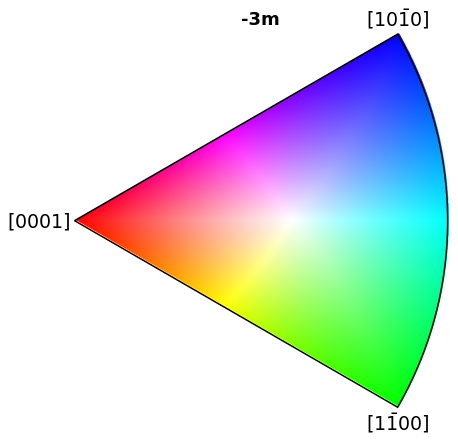

In [73]:
plot.IPFColorKeyTSL(symmetry.D3d).plot()

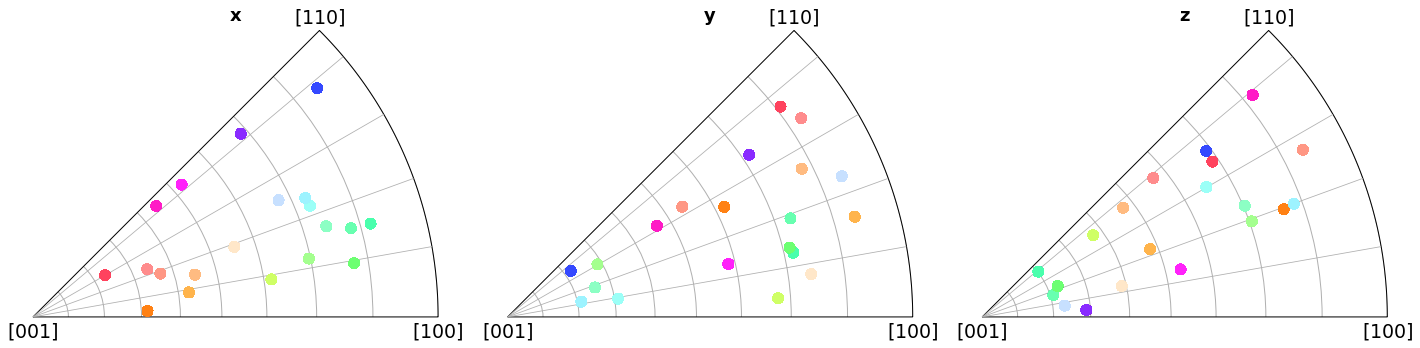

In [74]:
generate_ipf(voxel_orientation)

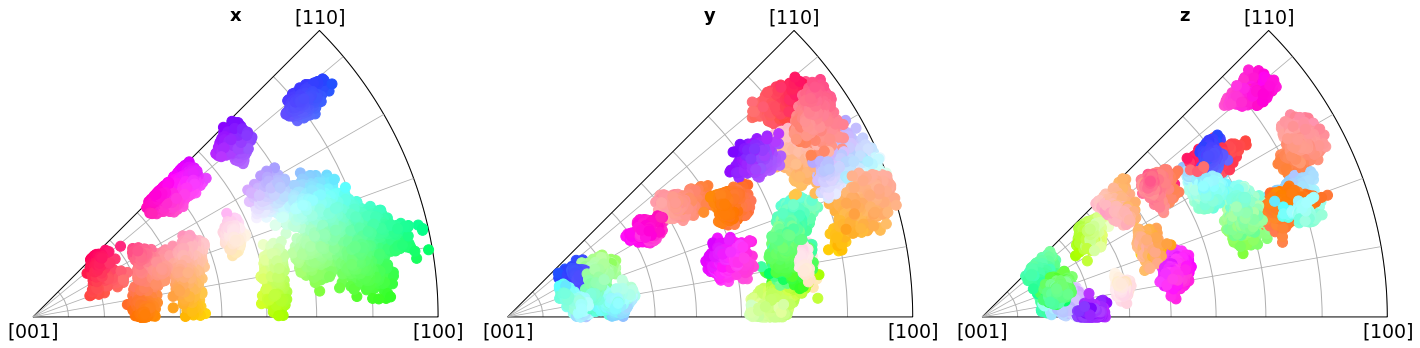

In [75]:
generate_ipf(get_rotation(result_20grains, 5))

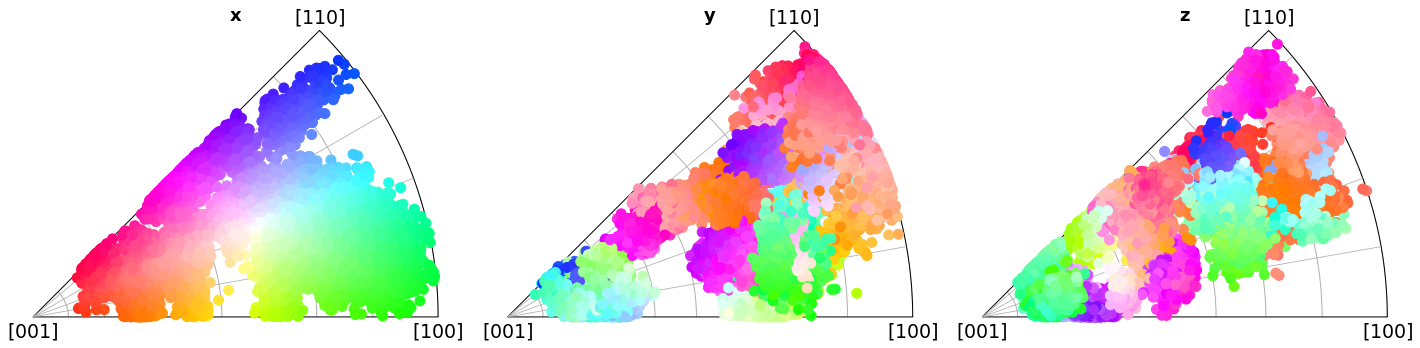

In [76]:
generate_ipf(get_rotation(result_20grains, 10))

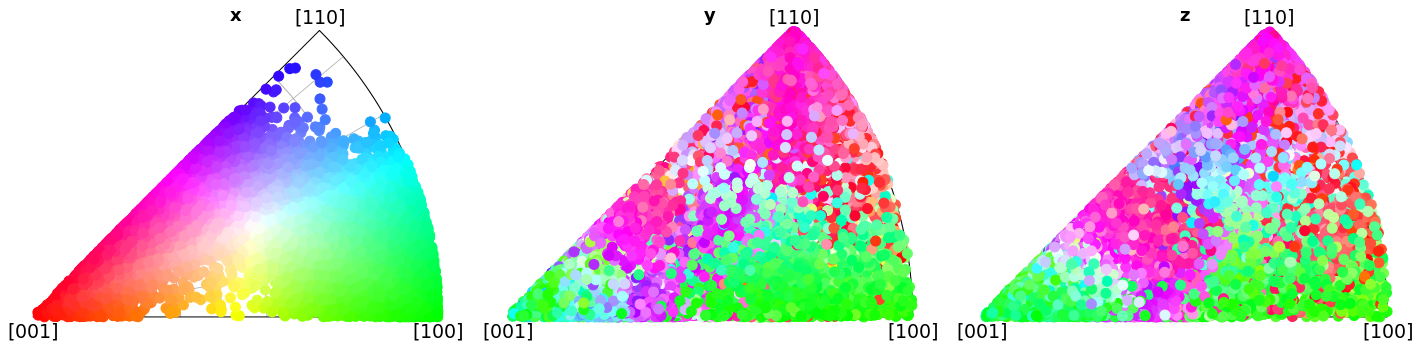

In [77]:
generate_ipf(get_rotation(result_20grains, 60))